In [2]:
# Importing the Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [13]:
# Loading the dataset

data = pd.read_csv(r"C:\Users\Shashi\Model Building\Ensemble Models\Tumor_Ensemble.csv")

In [14]:
# Importing the Libraries

import warnings
warnings.filterwarnings('ignore')

In [15]:
# Checking the head of data

data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
0,87139402,B,12.32,12.39,78.85,464.1,0.10280,0.06981,0.03987,0.03700,...,13.50,15.64,86.97,549.1,0.1385,0.1266,0.12420,0.09391,0.2827,0.06771
1,8910251,B,10.60,18.95,69.28,346.4,0.09688,0.11470,0.06387,0.02642,...,11.88,22.94,78.28,424.8,0.1213,0.2515,0.19160,0.07926,0.2940,0.07587
2,905520,B,11.04,16.83,70.92,373.2,0.10770,0.07804,0.03046,0.02480,...,12.41,26.44,79.93,471.4,0.1369,0.1482,0.10670,0.07431,0.2998,0.07881
3,868871,B,11.28,13.39,73.00,384.8,0.11640,0.11360,0.04635,0.04796,...,11.92,15.77,76.53,434.0,0.1367,0.1822,0.08669,0.08611,0.2102,0.06784
4,9012568,B,15.19,13.21,97.65,711.8,0.07963,0.06934,0.03393,0.02657,...,16.20,15.73,104.50,819.1,0.1126,0.1737,0.13620,0.08178,0.2487,0.06766


In [44]:
# Droping the Unrelated column

data = data.drop('id', axis = 1)

In [45]:
# Checking the Missing Values

data.isna().sum()

diagnosis            0
radius_mean          0
texture_mean         0
perimeter_mean       0
area_mean            0
smoothness_mean      0
compactness_mean     0
concavity_mean       0
points_mean          0
symmetry_mean        0
dimension_mean       0
radius_se            0
texture_se           0
perimeter_se         0
area_se              0
smoothness_se        0
compactness_se       0
concavity_se         0
points_se            0
symmetry_se          0
dimension_se         0
radius_worst         0
texture_worst        0
perimeter_worst      0
area_worst           0
smoothness_worst     0
compactness_worst    0
concavity_worst      0
points_worst         0
symmetry_worst       0
dimension_worst      0
dtype: int64

In [46]:
# Checking the duplicates

data.duplicated().sum()

0

In [47]:
# Checking the zero Variance 

data.var() == 0

diagnosis            False
radius_mean          False
texture_mean         False
perimeter_mean       False
area_mean            False
smoothness_mean      False
compactness_mean     False
concavity_mean       False
points_mean          False
symmetry_mean        False
dimension_mean       False
radius_se            False
texture_se           False
perimeter_se         False
area_se              False
smoothness_se        False
compactness_se       False
concavity_se         False
points_se            False
symmetry_se          False
dimension_se         False
radius_worst         False
texture_worst        False
perimeter_worst      False
area_worst           False
smoothness_worst     False
compactness_worst    False
concavity_worst      False
points_worst         False
symmetry_worst       False
dimension_worst      False
dtype: bool

In [48]:
# Encoder - LabelEncoder

from sklearn.preprocessing import LabelEncoder

In [49]:
enc = LabelEncoder()

data['diagnosis'] = enc.fit_transform(data['diagnosis'])

In [50]:
# Standardization - Scaling Min = 0, Max = 1

def norm_fun(i):
    x = (i - i.min())/(i.max() - i.min())
    
    return x

In [51]:
data_norm = norm_fun(data)
data = pd.DataFrame(data_norm)
data.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [52]:
# Checking the data Correlation

data.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,points_worst,symmetry_worst,dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<AxesSubplot:>

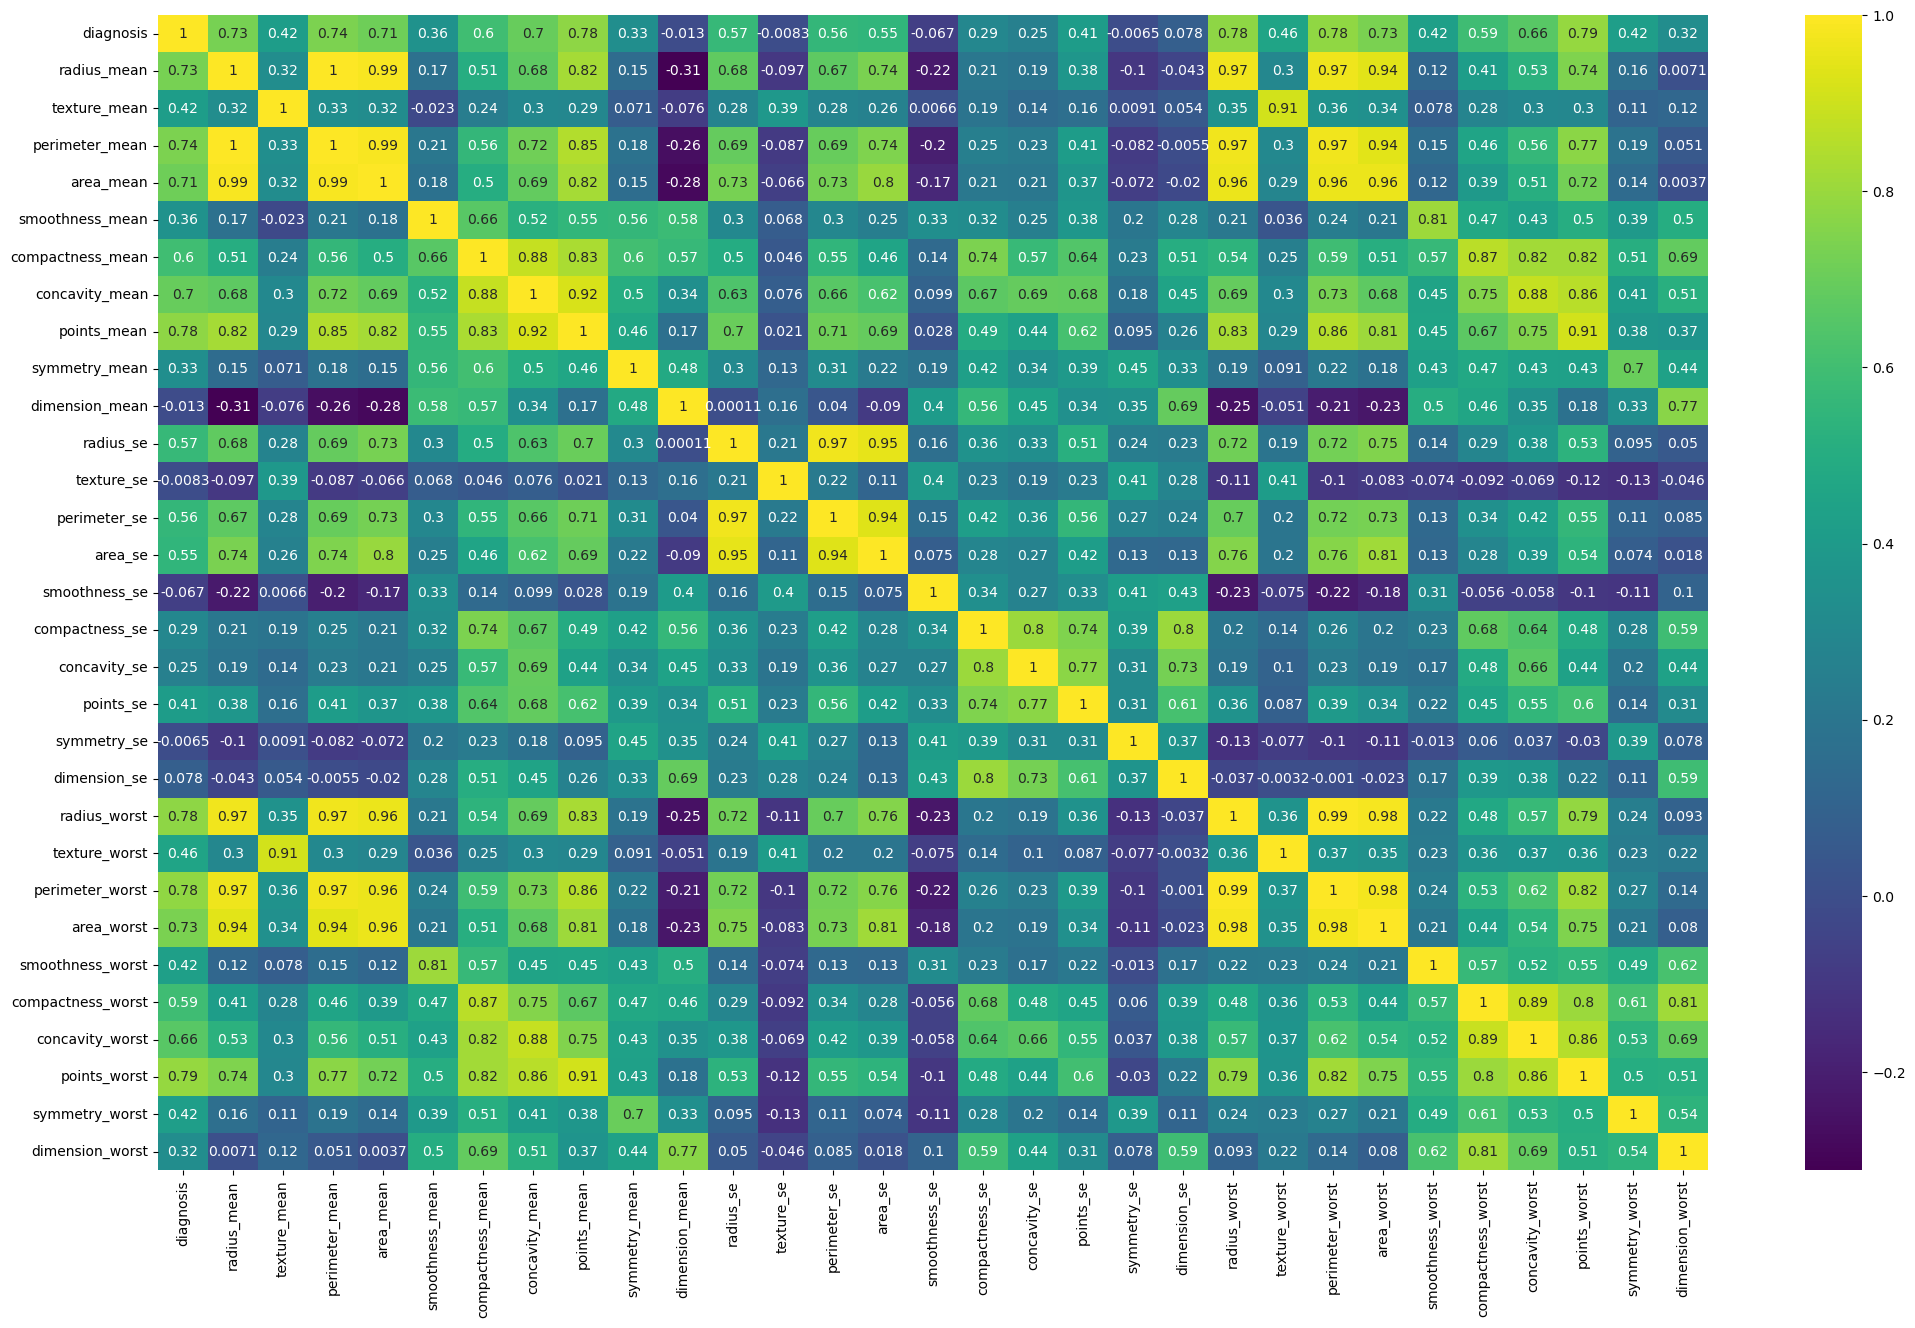

In [53]:
# Heat map

fig = plt.figure(figsize = (25,15))
sns.heatmap(data.corr(), cmap='viridis', annot = True) 

In [54]:
# Spliting the data

X = data.drop('diagnosis', axis = 1)
Y = data.diagnosis

In [55]:
# Importing the Train Test Split

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [28]:
# Creating the Model

from sklearn import tree

model = tree.DecisionTreeClassifier()
model.fit(x_train, y_train)

# Checking the score of
model.score(X, Y)

0.9894551845342706

In [29]:
# Prediction on Test Data
y_pred = model.predict(x_test)
pd.crosstab(y_pred, y_test)

np.mean(y_pred == y_test) # Test Data Accuracy 

0.9473684210526315

In [30]:
# Bagging

from sklearn import tree
clftree = tree.DecisionTreeClassifier()
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(base_estimator = clftree, n_estimators = 1000,
                            bootstrap = True, n_jobs = 1, random_state = 42)

bag_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, bag_clf.predict(x_test))
accuracy_score(y_test, bag_clf.predict(x_test))

# Evaluation on Training Data
confusion_matrix(y_train, bag_clf.predict(x_train))
accuracy_score(y_train, bag_clf.predict(x_train))

1.0

In [31]:
# Ada Boosting

from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(learning_rate = 0.02, n_estimators = 5000)

ada_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, ada_clf.predict(x_test))
accuracy_score(y_test, ada_clf.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, ada_clf.predict(x_train))


1.0

In [32]:
# Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

boost_clf = GradientBoostingClassifier()

boost_clf.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

confusion_matrix(y_test, boost_clf.predict(x_test))
accuracy_score(y_test, boost_clf.predict(x_test))

0.956140350877193

In [33]:
# Hyper Tuning - GradientBoosting

boost_clf3 = GradientBoostingClassifier(learning_rate = 0.2, n_estimators = 5000, max_depth = 1)
boost_clf3.fit(x_train, y_train)

from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, boost_clf3.predict(x_test))
accuracy_score(y_test, boost_clf3.predict(x_test))

# Evaluation on Training Data
accuracy_score(y_train, boost_clf3.predict(x_train))

1.0

In [56]:
# xgboost - want output to be numeric

import xgboost as xgb

xgb_clf = xgb.XGBClassifier(max_depths = 5, n_estimators = 10000, learning_rate = 0.3, n_jobs = -1)

# n_jobs – Number of parallel threads used to run xgboost.
# learning_rate (float) – Boosting learning rate (xgb’s “eta”)


xgb_clf.fit(x_train, y_train)

[07:25:09] WARNING: C:/buildkite-agent/builds/buildkite-windows-cpu-autoscaling-group-i-030221e36e1a46bfb-1/xgboost/xgboost-ci-windows/src/learner.cc:767: 
Parameters: { "max_depths" } are not used.



XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_depths=5, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=10000,
              n_jobs=-1, num_parallel_tree=1, predictor='auto', ...)

In [57]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Evaluation on Testing Data
confusion_matrix(y_test, xgb_clf.predict(x_test))
accuracy_score(y_test, xgb_clf.predict(x_test))


0.9736842105263158

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

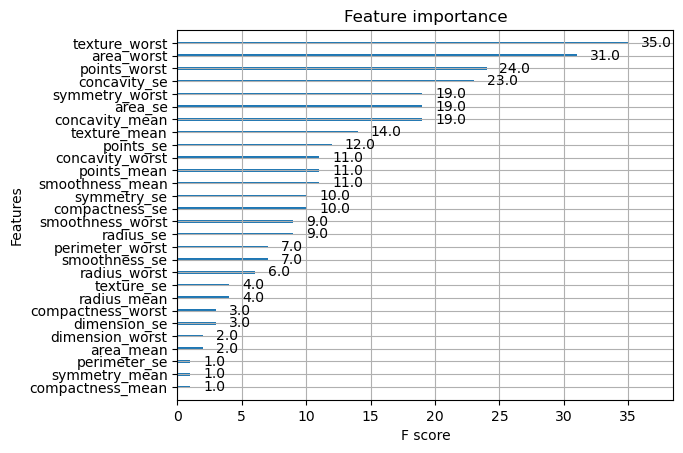

In [58]:
xgb.plot_importance(xgb_clf)

In [59]:
# GridsearchCV
xgb_clf = xgb.XGBClassifier(n_estimators = 500, learning_rate = 0.1, random_state = 42)

param_test1 = {'max_depth': range(3,10,2), 'gamma': [0.1, 0.2, 0.3],
               'subsample': [0.8, 0.9], 'colsample_bytree': [0.8, 0,9],
               'reg_alpha': [1e-2, 0.1, 1]}

# Grid Search
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(xgb_clf, param_test1, n_jobs = -1, cv = 5, scoring = 'accuracy')

grid_search.fit(x_train, y_train)

grid_search.best_params_
cv_xg_clf = grid_search.best_estimator_

# Evaluation on Testing Data with model with hyperparameter
accuracy_score(y_test, cv_xg_clf.predict(x_test))



0.9649122807017544

In [62]:
### k-Nearest Neighbors (k-NN) with GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

params_knn = {'n_neighbors': np.arange(1, 25)}

knn_gs = GridSearchCV(knn, params_knn, cv = 5)

knn_gs.fit(x_train, y_train)
knn_best = knn_gs.best_estimator_
knn_best

KNeighborsClassifier(n_neighbors=7)

In [63]:
### Random Forest Classifier with GridSearchCV

from sklearn import datasets, linear_model, svm, neighbors, naive_bayes, ensemble

rf = ensemble.RandomForestClassifier(random_state = 0)

params_rf = {'n_estimators': [50, 100, 200]}

rf_gs = GridSearchCV(rf, params_rf, cv = 5)

rf_gs.fit(x_train, y_train)
rf_best = rf_gs.best_estimator_

In [64]:
### Logistic Regression with GridSearchCV
log_reg = linear_model.LogisticRegression(random_state = 123, solver = "liblinear", 
                                          penalty = "l2", max_iter = 5000)
C = np.logspace(1, 4, 10)
params_lr = dict(C = C)

lr_gs = GridSearchCV(log_reg, params_lr, cv = 5, verbose = 0)

lr_gs.fit(x_train, y_train)
lr_best = lr_gs.best_estimator_

In [65]:
# Combine all three Voting Ensembles

from sklearn.ensemble import VotingClassifier

estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

# Instantiate the voting classifier
ensemble_H = VotingClassifier(estimators, voting = "hard")

# Fit classifier with the training data
hard_voting = ensemble_H.fit(x_train, y_train)

In [66]:
# Save the voting classifier

import pickle

pickle.dump(hard_voting, open('hard_voting.pkl', 'wb'))

# Loading a saved model
model = pickle.load(open('hard_voting.pkl', 'rb'))
model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('log_reg',
                              LogisticRegression(C=46.41588833612777,
                                                 max_iter=5000,
                                                 random_state=123,
                                                 solver='liblinear'))])

In [67]:
print("knn_gs.score: ", knn_best.score(x_test, y_test))
# Output: knn_gs.score:

print("rf_gs.score: ", rf_best.score(x_test, y_test))
# Output: rf_gs.score:

print("log_reg.score: ", lr_best.score(x_test, y_test))
# Output: log_reg.score:

knn_gs.score:  0.956140350877193
rf_gs.score:  0.956140350877193
log_reg.score:  0.9824561403508771


In [68]:
print("ensemble.score: ", ensemble_H.score(x_test, y_test))
# Output: ensemble.score:

ensemble.score:  0.9736842105263158


In [69]:
# Soft Voting

# Combine all 3 models using VotingClassifier with voting = "soft" parameter
estimators = [('knn', knn_best), ('rf', rf_best), ('log_reg', lr_best)]

ensemble_S = VotingClassifier(estimators, voting = "soft")

soft_voting = ensemble_S.fit(x_train, y_train)

In [70]:
# Soft Voting

# Save model
pickle.dump(soft_voting, open('soft_voting.pkl', 'wb'))


# Load the saved model
model = pickle.load(open('soft_voting.pkl', 'rb'))
model

VotingClassifier(estimators=[('knn', KNeighborsClassifier(n_neighbors=7)),
                             ('rf', RandomForestClassifier(random_state=0)),
                             ('log_reg',
                              LogisticRegression(C=46.41588833612777,
                                                 max_iter=5000,
                                                 random_state=123,
                                                 solver='liblinear'))],
                 voting='soft')

In [71]:
print("knn_gs.score: ", knn_gs.score(x_test, y_test))
# Output: knn_gs.score:

print("rf_gs.score: ", rf_gs.score(x_test, y_test))
# Output: rf_gs.score:

print("log_reg.score: ", lr_gs.score(x_test, y_test))
# Output: log_reg.score:

knn_gs.score:  0.956140350877193
rf_gs.score:  0.956140350877193
log_reg.score:  0.9824561403508771


In [72]:
print("ensemble.score: ", ensemble_S.score(x_test, y_test))
# Output: ensemble.score: AVG or WT.AVG

ensemble.score:  0.9649122807017544


In [73]:
# Import Libraries

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [74]:
# Stacking

# Base estimators

estimators = [('rf', RandomForestClassifier(n_estimators = 10, random_state = 42)),
              ('svr', make_pipeline(StandardScaler(), LinearSVC(random_state = 42)))]

In [75]:
# Meta Model stacked on top of base estimators

clf = StackingClassifier(estimators = estimators, final_estimator = LogisticRegression())

In [76]:
# Fit the model on traing data

stacking = clf.fit(x_train, y_train)

In [77]:
# Accuracy

stacking.score(x_test, y_test)

0.9649122807017544

In [78]:
# Save the Stacking model 
pickle.dump(stacking, open('stacking_Canser.pkl', 'wb'))

In [79]:
# Load the saved model

model = pickle.load(open('stacking_Canser.pkl', 'rb'))
model

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('svr',
                                Pipeline(steps=[('standardscaler',
                                                 StandardScaler()),
                                                ('linearsvc',
                                                 LinearSVC(random_state=42))]))],
                   final_estimator=LogisticRegression())

In [80]:
pred = model.predict(x_test)

In [81]:
pred

array([1., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0.,
       1., 1., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 0., 0., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0.])

In [82]:
y_test

512    1.0
457    1.0
439    0.0
298    0.0
37     0.0
      ... 
213    0.0
519    0.0
432    0.0
516    1.0
500    1.0
Name: diagnosis, Length: 114, dtype: float64

## Result : This model score is more than 95%, By Performing Boosting, Bagging, Voting, Staking with Grid Search Cv, identifying the best score and best parameter, concluding by saying this model is right fit